<a href="https://colab.research.google.com/github/Daham-abeyratne/Customer_Churn_Prediction/blob/main/costomer_churn_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
!mkdir Customer_Churn_Prediction
%cd Customer_Churn_Prediction


/content/Customer_Churn_Prediction


In [166]:
!ls

In [167]:
!git init
!git config --global user.email "dahamabeyratney@gmail.com"
!git config --global user.name "Daham-Abeyratne"


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/Customer_Churn_Prediction/.git/


In [168]:
pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 46.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [169]:
pip install --upgrade imbalanced-learn

# **Import Data**

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
telco_data = pd.read_csv('/content/drive/MyDrive/ML_CW/Telco-Customer-Churn.csv')
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Exploratory Data Analysis (EDA)**

In [172]:
print("Rows: ", telco_data.shape[0])
print("Columns: ", telco_data.shape[1])

Rows:  7043
Columns:  21


In [173]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [174]:
telco_data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


the totalCharges should be numeric but it is in object format

In [175]:
print("Statistics")
telco_data.describe()

Statistics


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [176]:
print("Missing Values")
print(telco_data.isnull().sum())

Missing Values
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [177]:
print("Duplicate Values")
print(telco_data.duplicated().sum())

Duplicate Values
0


In [178]:
print("Target Variable")
print(telco_data['Churn'].value_counts())

print("\nPercentage of Target Variable:")
print((telco_data['Churn'].value_counts()/telco_data.shape[0]*100).round(2))

Target Variable
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentage of Target Variable:
Churn
No     73.46
Yes    26.54
Name: count, dtype: float64


In [179]:
datacopy = telco_data.copy()

for col in datacopy:
    if datacopy[col].dtype == "object":
        datacopy[col] = datacopy[col].astype(str).str.strip()
datacopy.drop(columns=['customerID'],inplace=True)
datacopy.drop(columns=['TotalCharges'],inplace=True)
datacopy.drop(columns=['MonthlyCharges'],inplace=True)
datacopy.drop(columns=['tenure'],inplace=True)
# Show unique values
for col in datacopy:
    if col in datacopy:
        print(f"\nUnique values in {col}:")
        print(datacopy[col].value_counts())


Unique values in gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Unique values in SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Unique values in Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Unique values in Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Unique values in PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Unique values in MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Unique values in InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Unique values in OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Unique values in OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No

In [180]:
for col in telco_data:
  unkown =(telco_data[col] == ' ').sum()
  print(f"{col}: {unkown} unkown values")

customerID: 0 unkown values
gender: 0 unkown values
SeniorCitizen: 0 unkown values
Partner: 0 unkown values
Dependents: 0 unkown values
tenure: 0 unkown values
PhoneService: 0 unkown values
MultipleLines: 0 unkown values
InternetService: 0 unkown values
OnlineSecurity: 0 unkown values
OnlineBackup: 0 unkown values
DeviceProtection: 0 unkown values
TechSupport: 0 unkown values
StreamingTV: 0 unkown values
StreamingMovies: 0 unkown values
Contract: 0 unkown values
PaperlessBilling: 0 unkown values
PaymentMethod: 0 unkown values
MonthlyCharges: 0 unkown values
TotalCharges: 11 unkown values
Churn: 0 unkown values


# **Visualization**

In [181]:
eda_data = telco_data.copy()
eda_data['TotalCharges'] = pd.to_numeric(eda_data['TotalCharges'], errors='coerce')
eda_data['Churn'] = eda_data['Churn'].map({'No': 0, 'Yes': 1})

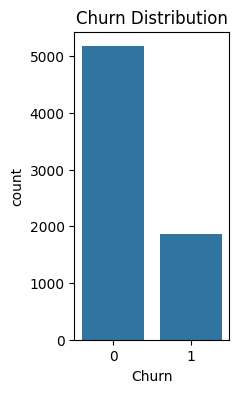

In [182]:
plt.figure(figsize=(2,4))
sns.countplot(data=eda_data, x='Churn')
plt.title('Churn Distribution')
plt.show()

In [183]:
num_cols = ['tenure', 'MonthlyCharges','TotalCharges']

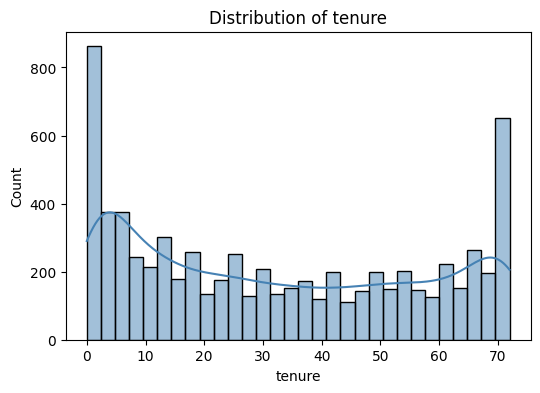

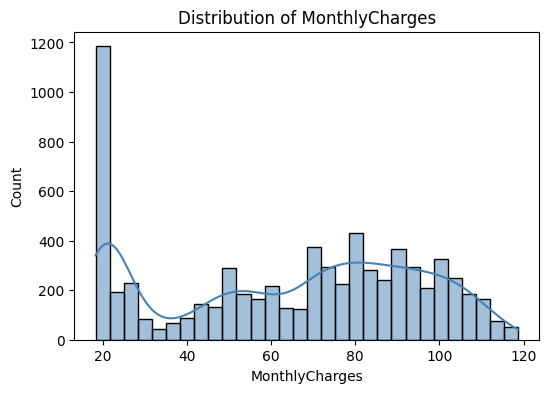

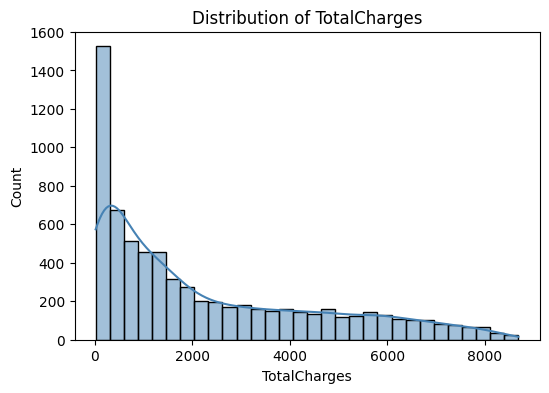

In [184]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(eda_data[col], kde=True, bins=30, color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.show()

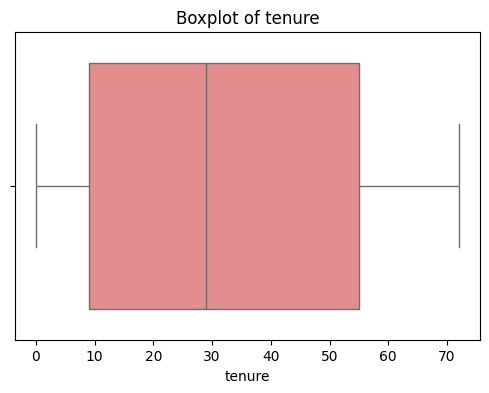

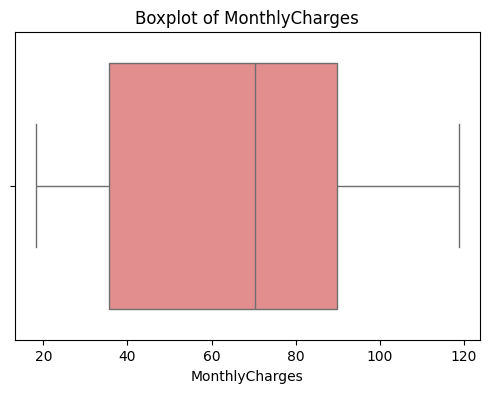

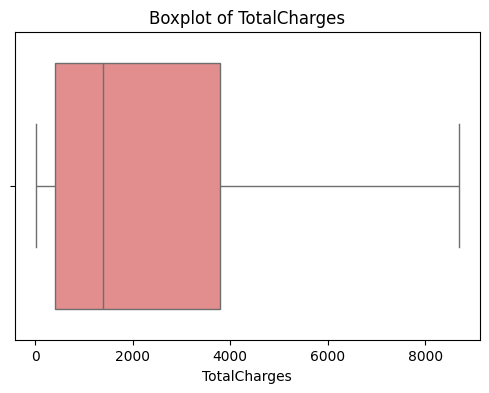

In [185]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=eda_data[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
    plt.show()

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


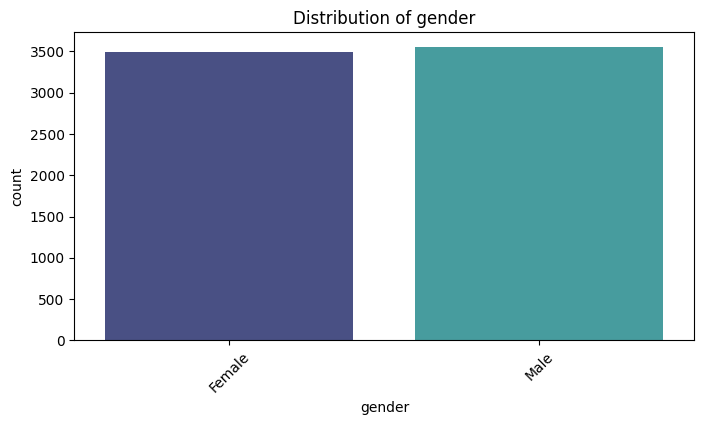

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


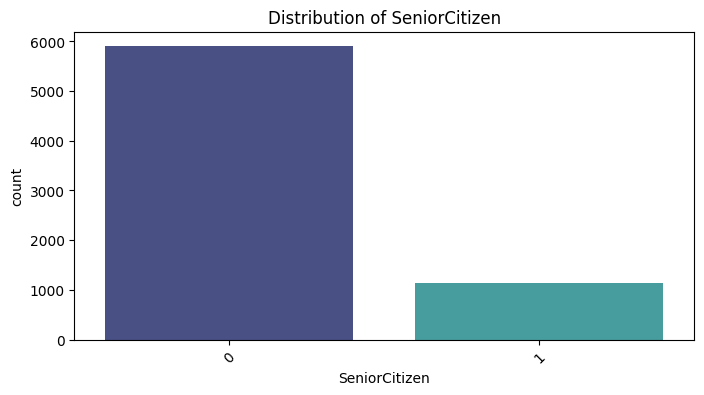

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


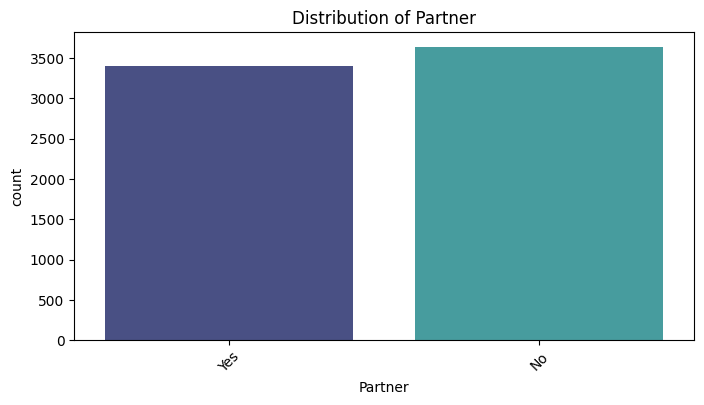

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


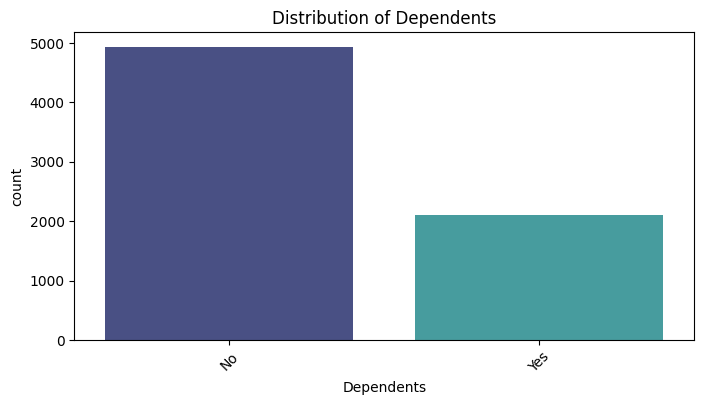

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


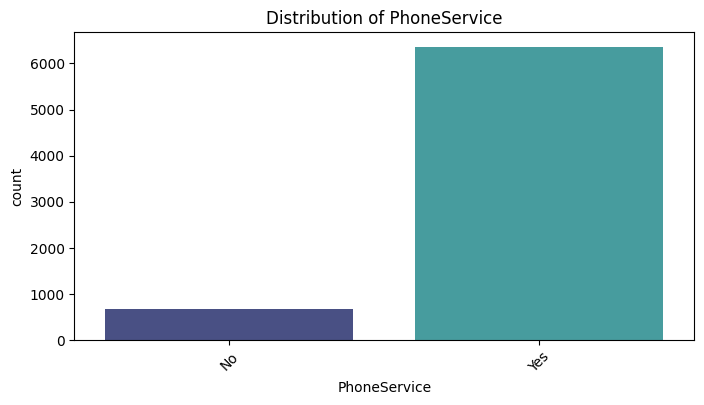

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


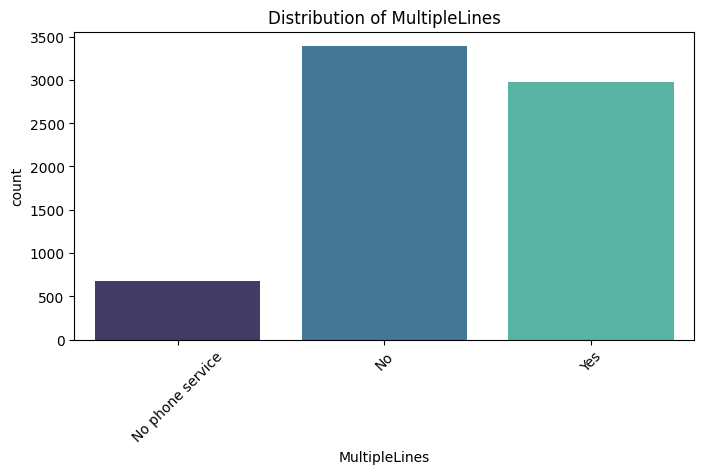

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


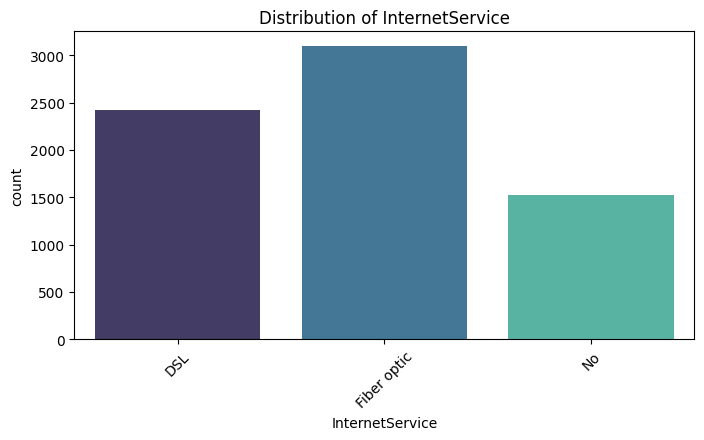

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


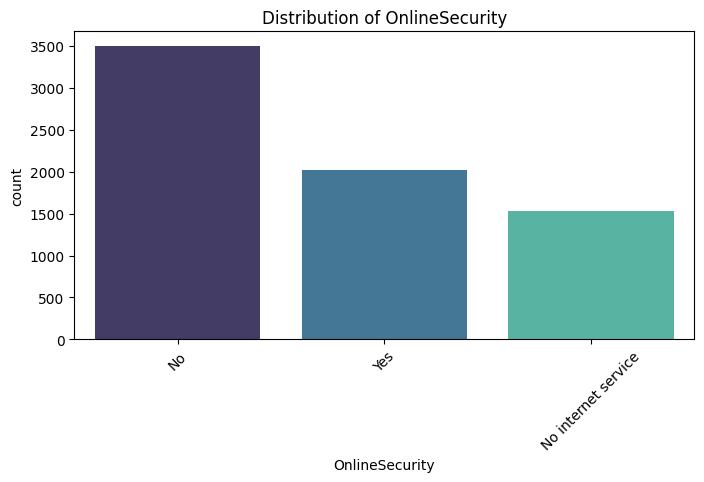

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


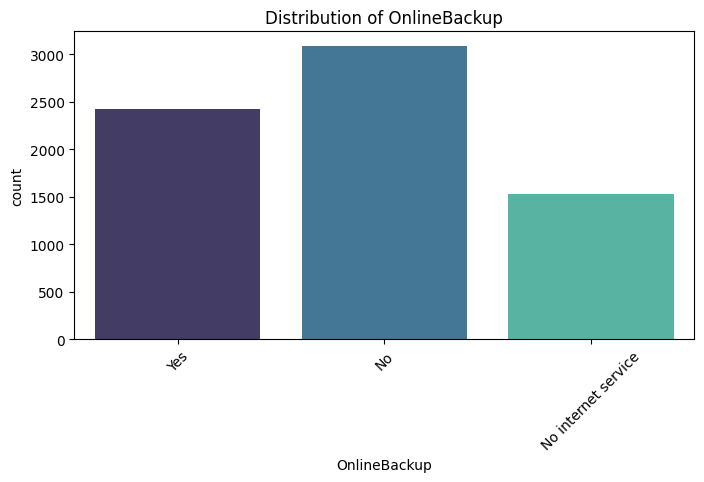

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


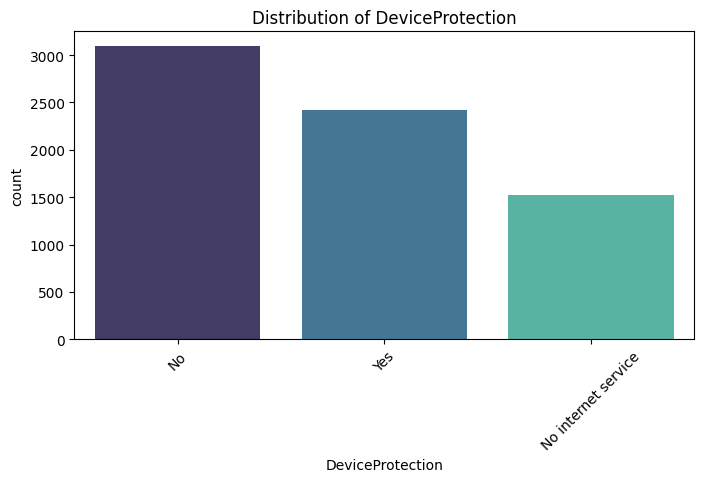

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


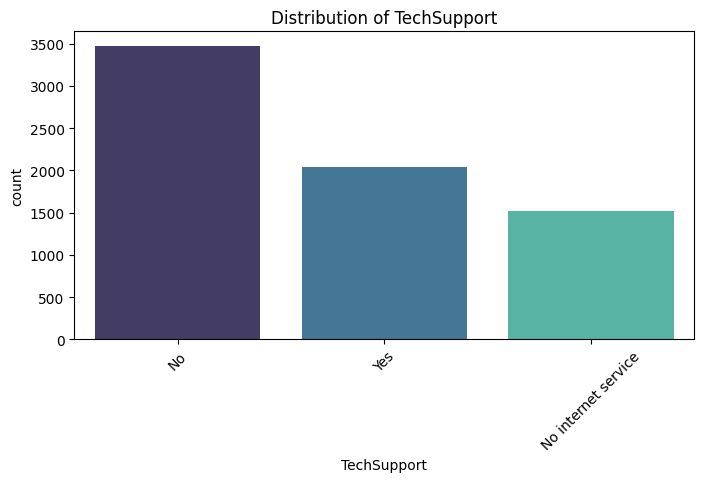

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


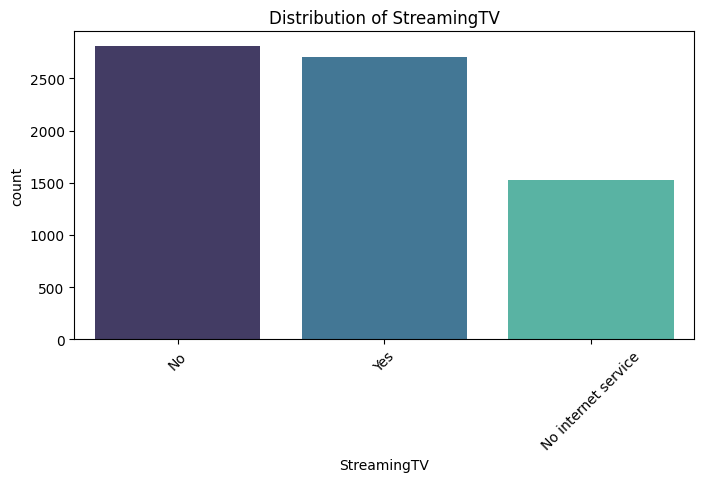

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


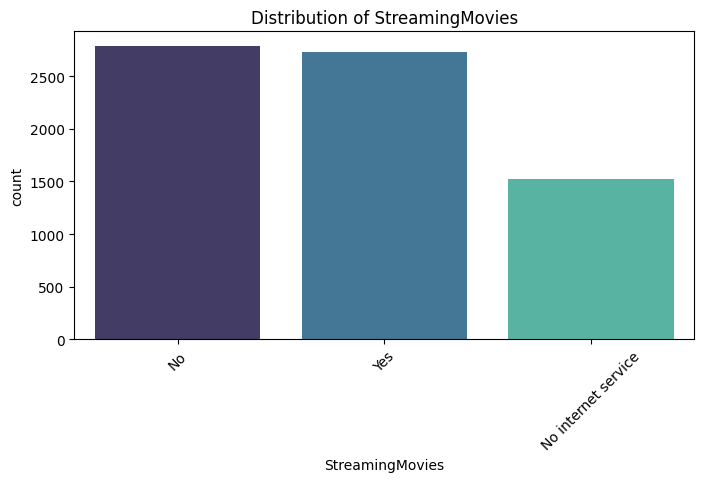

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


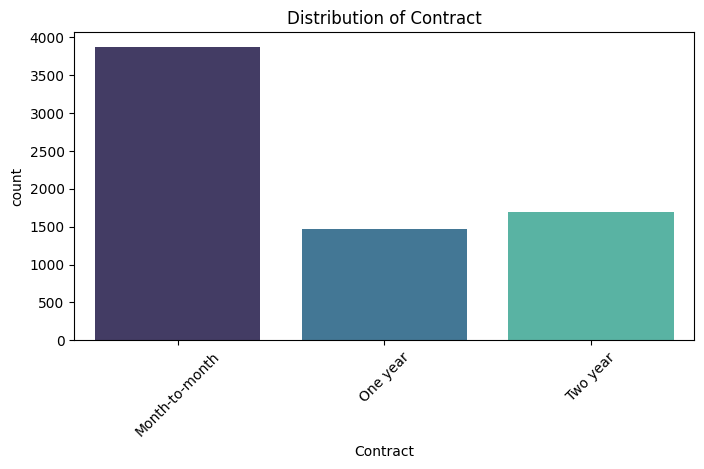

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


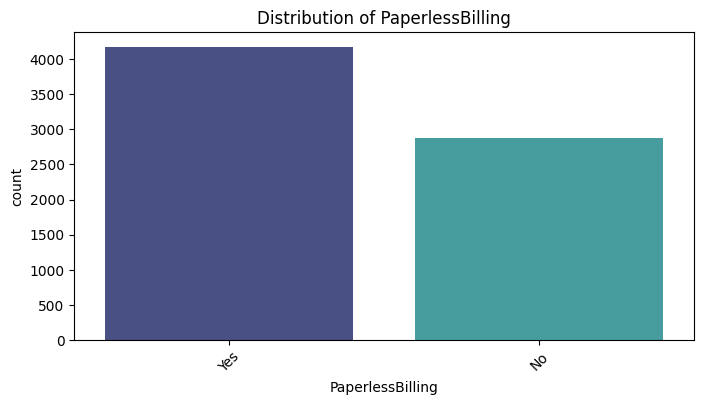

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


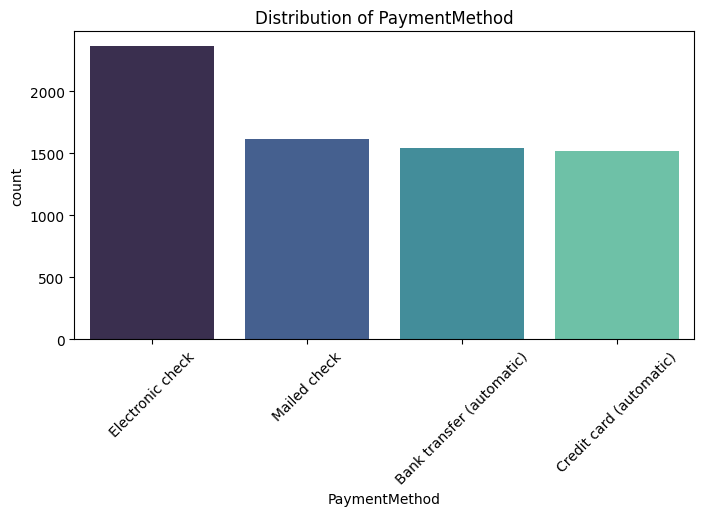

/tmp/ipython-input-3396279927.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_data, x=col, palette='mako')


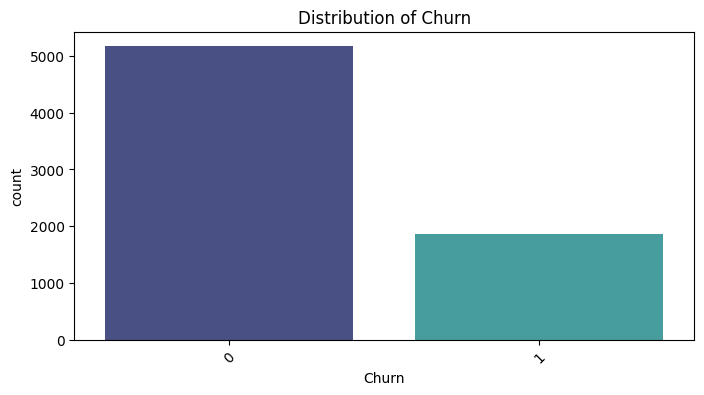

In [186]:
for col in datacopy:
    plt.figure(figsize=(8,4))
    sns.countplot(data=eda_data, x=col, palette='mako')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


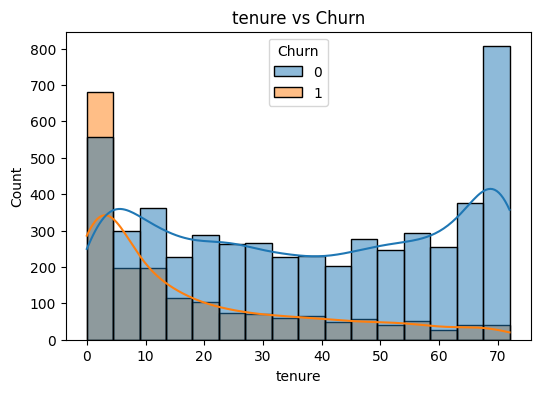

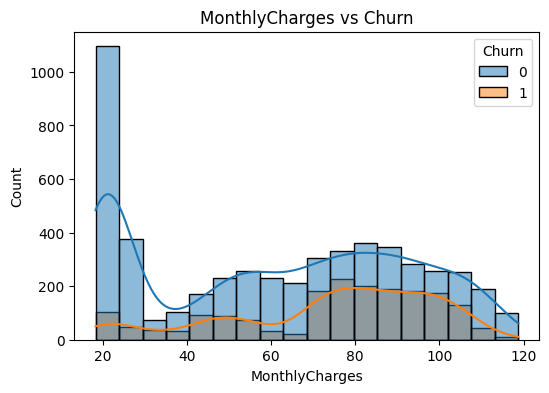

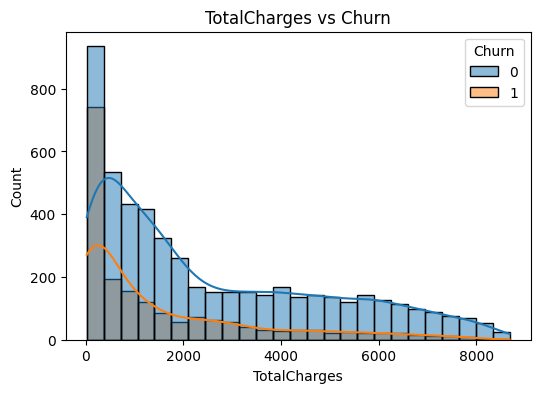

In [187]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=eda_data, x=col, hue='Churn', kde=True)
    plt.title(f"{col} vs Churn")
    plt.show()


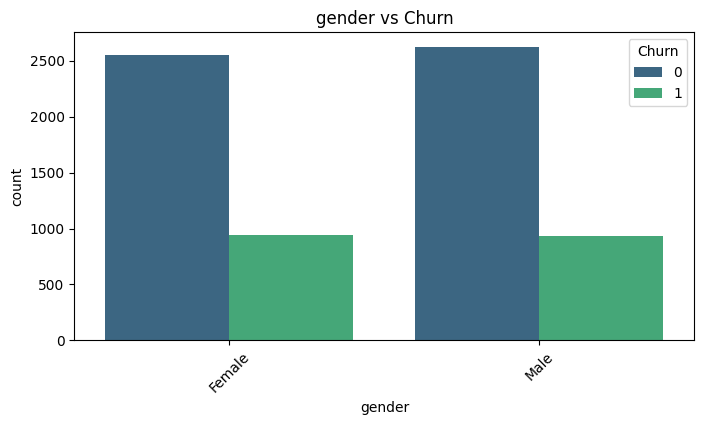

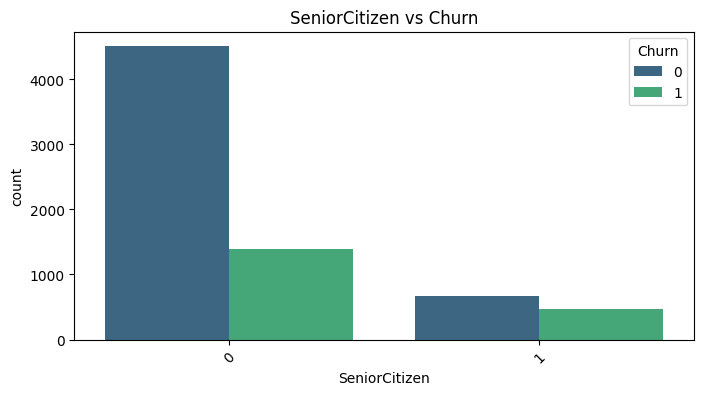

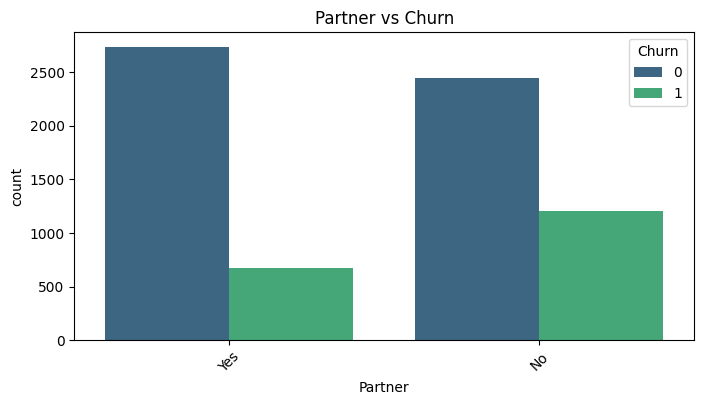

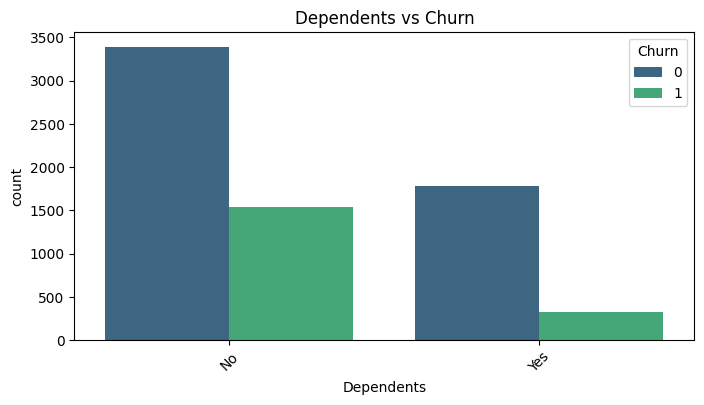

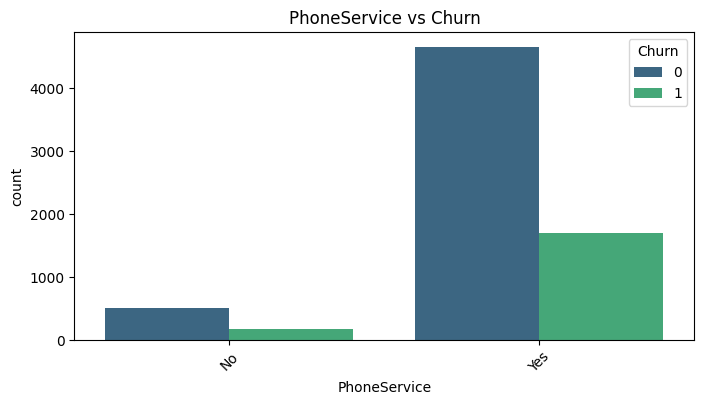

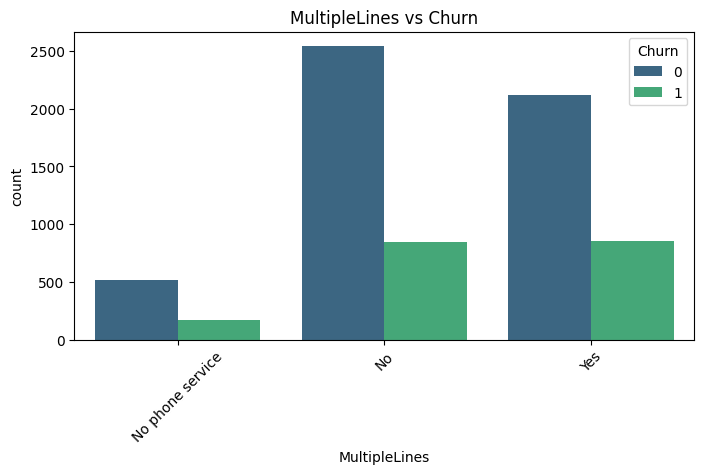

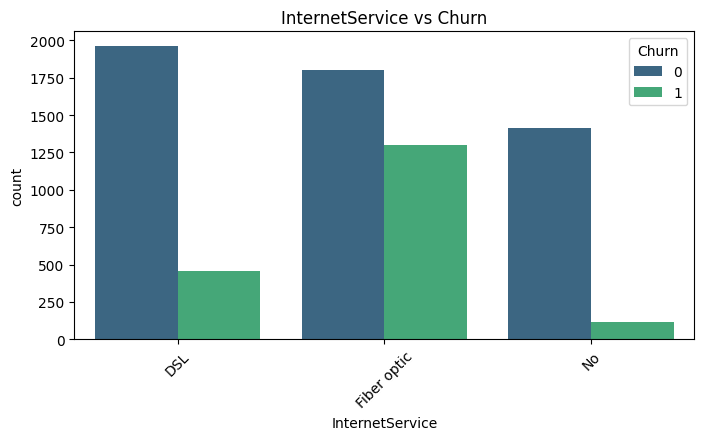

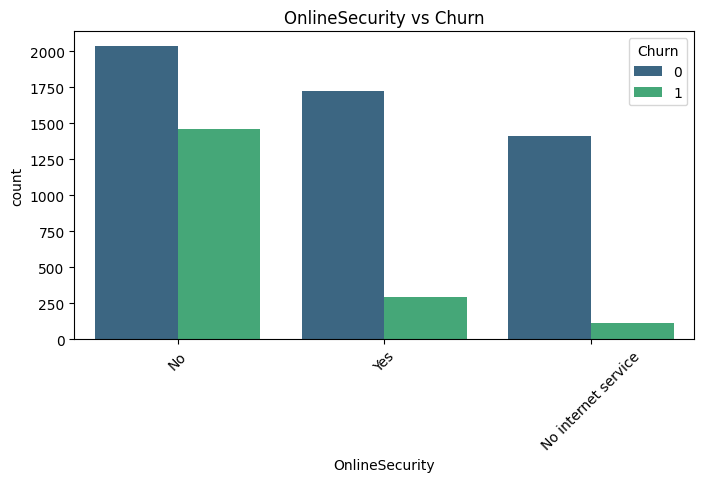

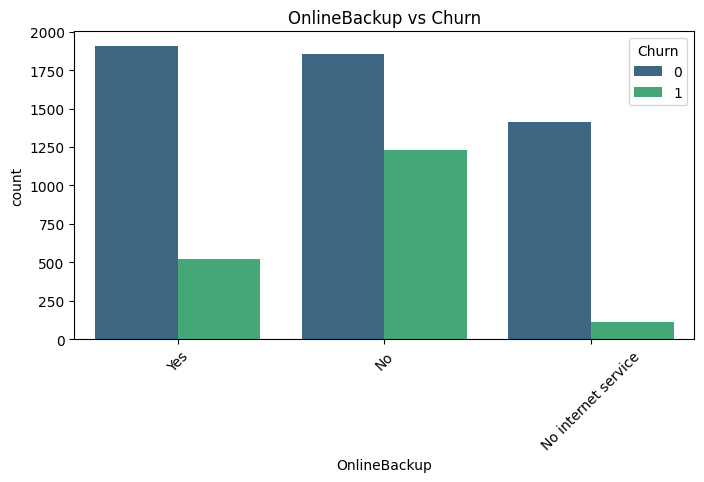

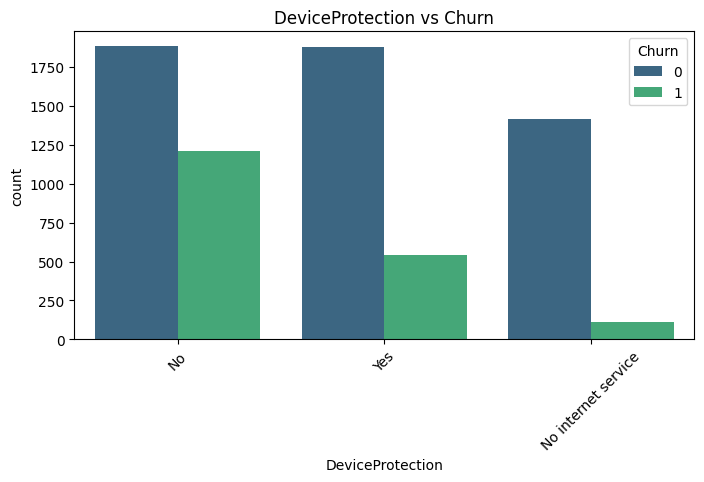

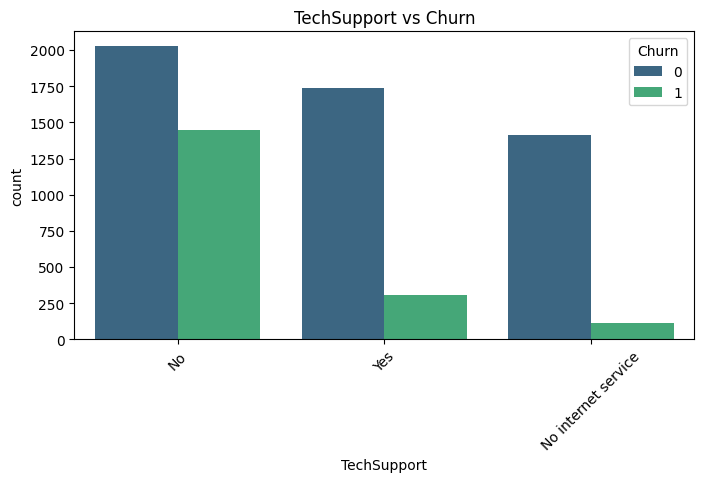

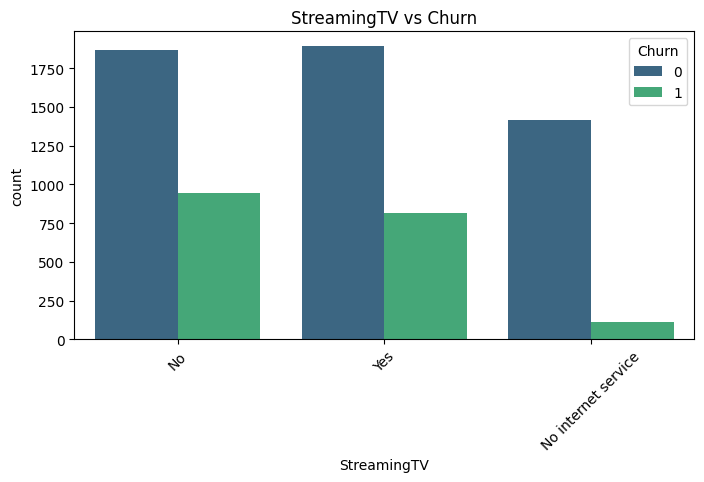

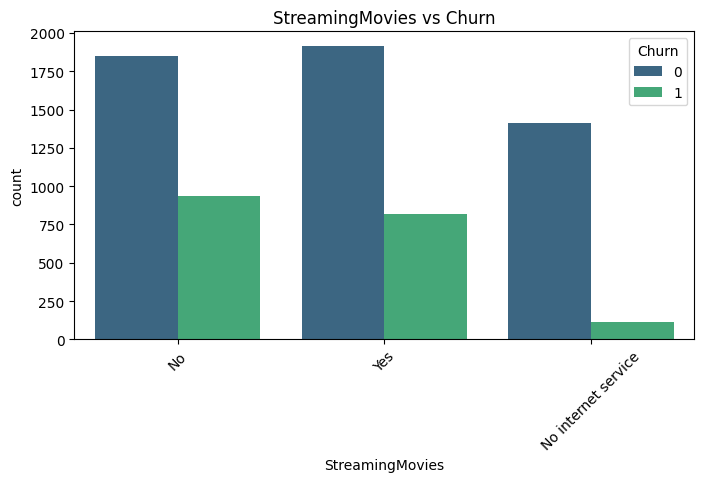

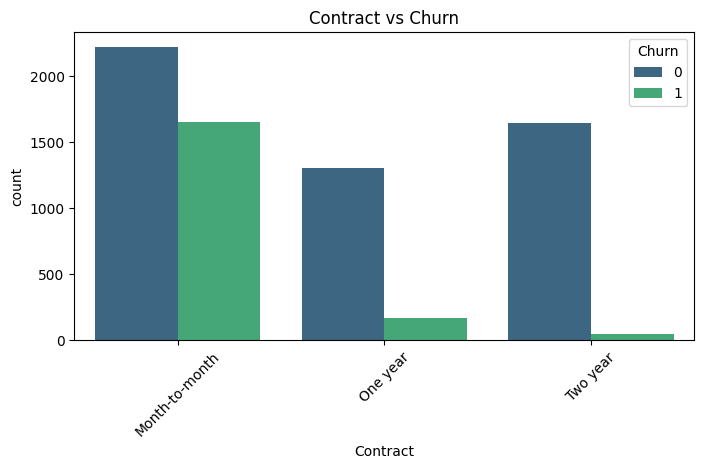

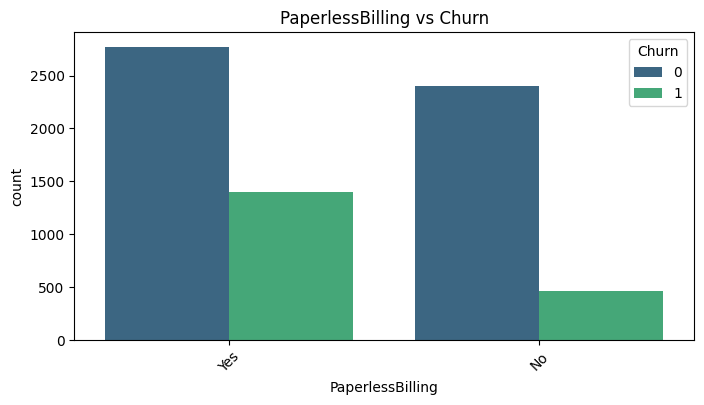

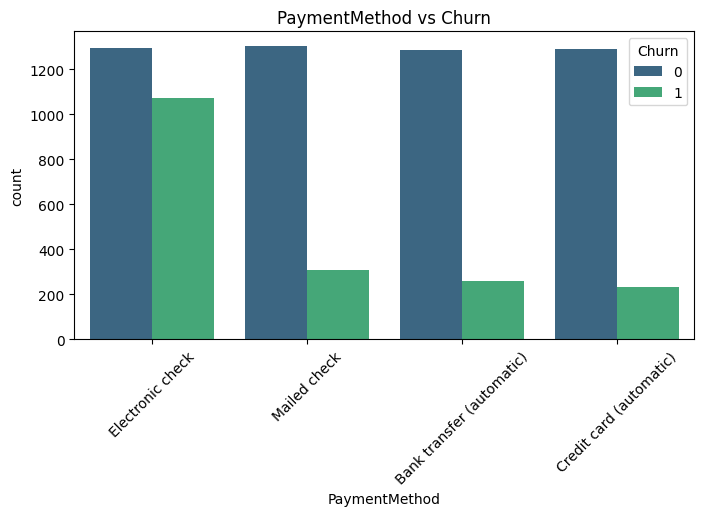

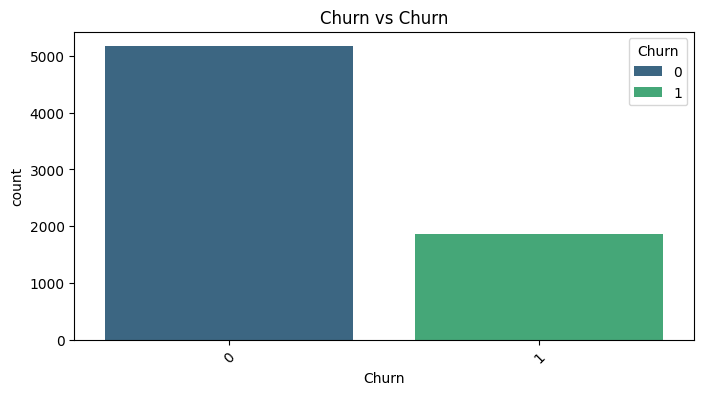

In [188]:
for col in datacopy:
    plt.figure(figsize=(8,4))
    sns.countplot(data=eda_data, x=col, hue='Churn', palette='viridis')
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()


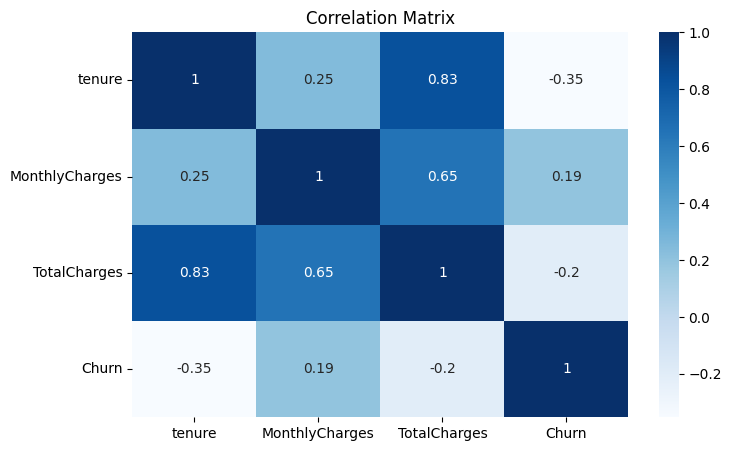

In [189]:
plt.figure(figsize=(8,5))
sns.heatmap(eda_data[num_cols + ['Churn']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()


# **PreProcessing**

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [191]:
# Converting TotalCharges to numeric
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')

# Checking missing values created by conversion
print("Missing TotalCharges after conversion:", telco_data['TotalCharges'].isna().sum())

# Droping rows with missing values
telco_data = telco_data.dropna().reset_index(drop=True)

#dataset shape after droping
print("Rows after droping ::" , telco_data.shape[0])


Missing TotalCharges after conversion: 11
Rows after droping :: 7032


In [192]:
#converting target variable to numeric in the main dataset
telco_data['Churn'] = telco_data['Churn'].map({'Yes': 1, 'No': 0})

In [193]:
telco_data = telco_data.drop(columns=['customerID'])

# **Feature engineering**

In [194]:
# Select categorical columns
cat_cols = telco_data.select_dtypes(include=['object']).columns

# One-hot encode
telco_data = pd.get_dummies(telco_data, columns=cat_cols, drop_first=True)


In [195]:
telco_data['TenureGroup'] = pd.cut(
    telco_data['tenure'],
    bins=[0, 12, 24, 48, 60, 100],
    labels=['0-12', '12-24', '24-48', '48-60', '60+']
)

In [196]:
service_yes_cols = [
    'PhoneService_Yes',
    'MultipleLines_Yes',
    'OnlineSecurity_Yes',
    'OnlineBackup_Yes',
    'DeviceProtection_Yes',
    'TechSupport_Yes',
    'StreamingTV_Yes',
    'StreamingMovies_Yes',
    'InternetService_Fiber optic'
]

telco_data['TotalServices'] = telco_data[service_yes_cols].sum(axis=1)


In [197]:
telco_data['HasFiber'] = telco_data['InternetService_Fiber optic']


In [198]:
telco_data['ContractRisk'] = (
    3 * (1 - telco_data['Contract_One year'] - telco_data['Contract_Two year']) +  # Month-to-month
    2 * telco_data['Contract_One year'] +                                          # One year
    1 * telco_data['Contract_Two year']                                            # Two year
)


In [199]:
telco_data['ChargeTenureInteraction'] = telco_data['MonthlyCharges'] * telco_data['tenure']


In [200]:
# Encode remaining object columns such as TenureGroup
cat_cols = telco_data.select_dtypes(include=['category']).columns

if len(cat_cols) > 0:
    telco_data = pd.get_dummies(telco_data, columns=cat_cols, drop_first=True)


In [201]:
telco_data.select_dtypes(include=['category']).columns


Index([], dtype='object')

In [202]:
telco_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalServices,HasFiber,ContractRisk,ChargeTenureInteraction,TenureGroup_12-24,TenureGroup_24-48,TenureGroup_48-60,TenureGroup_60+
0,0,1,29.85,29.85,0,False,True,False,False,True,...,True,False,1,False,3,29.85,False,False,False,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,True,3,False,2,1936.30,False,True,False,False
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,True,3,False,3,107.70,False,False,False,False
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,3,False,2,1903.50,False,True,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,True,False,2,True,3,141.40,False,False,False,False


In [203]:
X = telco_data.drop('Churn', axis=1)
y = telco_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5625, 38)
Test shape: (1407, 38)


# **Decision Tree Model**

base model

In [204]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [205]:
dt_baseline = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced'     # Important due to churn imbalance
)

dt_baseline.fit(X_train, y_train)

# Predictions on test set
y_pred_baseline = dt_baseline.predict(X_test)

# Baseline Evaluation
print("=== BASELINE DECISION TREE CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred_baseline))

=== BASELINE DECISION TREE CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1033
           1       0.50      0.48      0.49       374

    accuracy                           0.73      1407
   macro avg       0.66      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407



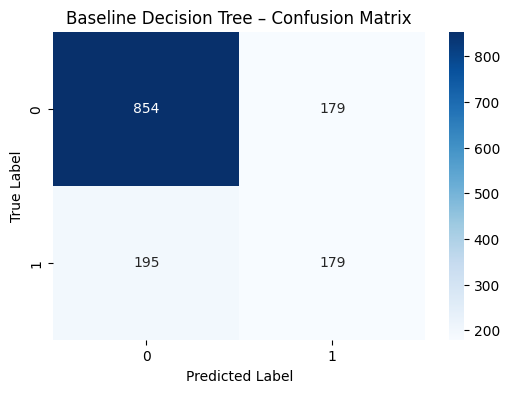

In [206]:
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_baseline),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.title("Baseline Decision Tree – Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


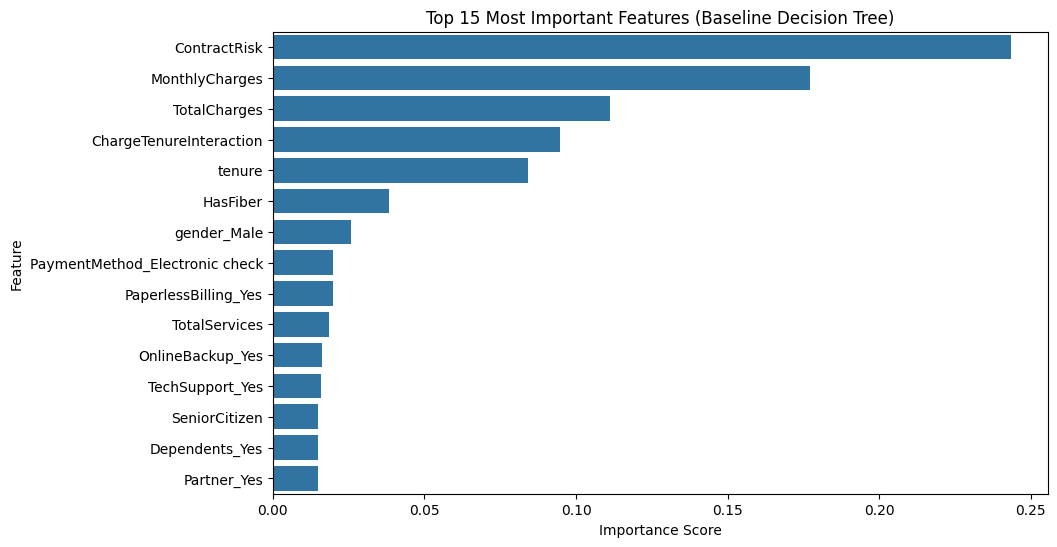

In [207]:
# Extract feature importances
importances = dt_baseline.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(10,6))
sns.barplot(
    x=importances[indices][:15],
    y=feature_names[indices][:15]
)
plt.title("Top 15 Most Important Features (Baseline Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [208]:
# Hyperparameter grid chosen to balance complexity & performance
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10]
}

dt_model = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced'        # again, handles churn imbalance
)

grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='f1',                   # Perfect choice for churn (imbalanced)
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("=== BEST PARAMETERS FOUND BY GRID SEARCH ===")
print(grid_search.best_params_)

print("\nBest F1-score from CV:", grid_search.best_score_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
=== BEST PARAMETERS FOUND BY GRID SEARCH ===
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Best F1-score from CV: 0.6177607100671441


In [209]:
# Retrieve best estimator
best_dt = grid_search.best_estimator_

# Predict on test set
y_pred_best = best_dt.predict(X_test)

print("=== TUNED DECISION TREE CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred_best))


=== TUNED DECISION TREE CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1033
           1       0.51      0.76      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407



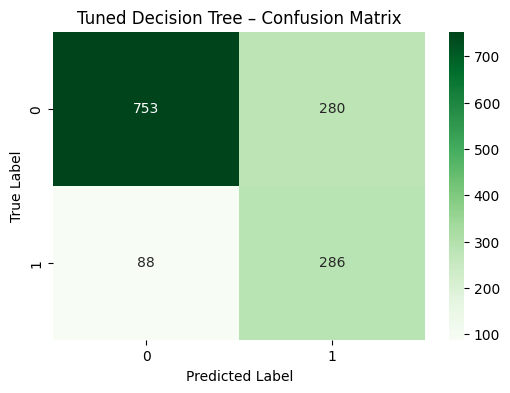

In [210]:
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_best),
    annot=True,
    fmt="d",
    cmap="Greens"
)
plt.title("Tuned Decision Tree – Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


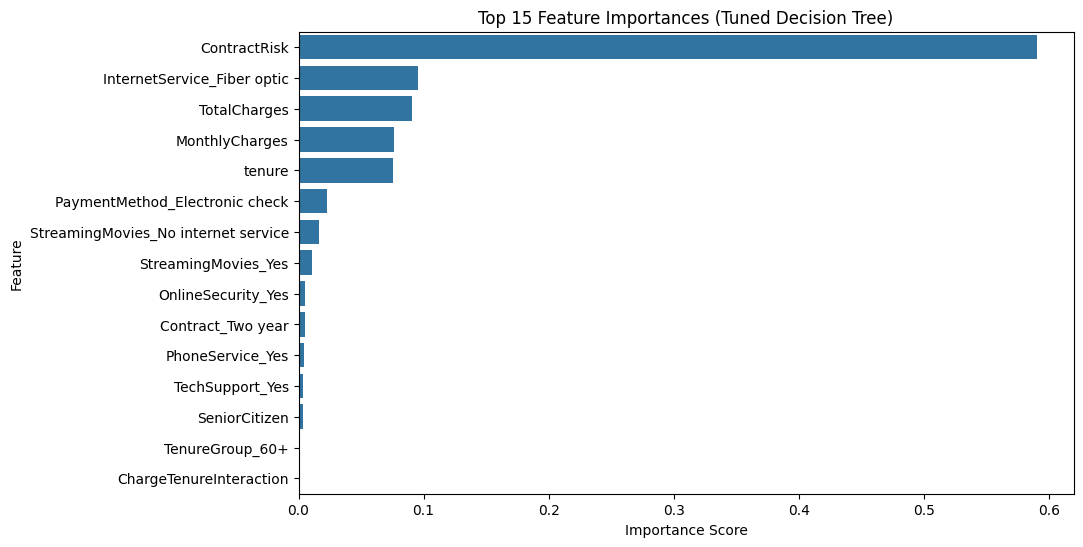

In [211]:
importances = best_dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(
    x=importances[indices][:15],
    y=X_train.columns[indices][:15]
)
plt.title("Top 15 Feature Importances (Tuned Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


# **Neural Network**

In [212]:
# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# sklearn utilities
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [213]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [214]:
# Compute class weights from y_train
cw = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: cw[0], 1: cw[1]}
print("Class weights:", class_weights)

Class weights: {0: np.float64(0.6809927360774818), 1: np.float64(1.8812709030100334)}


In [215]:
input_dim = X_train_scaled.shape[1]

def make_model(input_dim, dropout_rate=0.25, lr=1e-3):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(dropout_rate),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate*0.8),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate*0.5),

        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

model = make_model(input_dim)
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,257 (63.50 KB)

 Trainable params: 15,809 (61.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [216]:
checkpoint_path = "best_nn_model.h5"
es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)
mc = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)


In [217]:
BATCH_SIZE = 64
EPOCHS = 50

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,        # keep separate validation from train
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    class_weight=class_weights,  # important for imbalanced data
    callbacks=[es, mc],
    verbose=2
)


Epoch 1/50

Epoch 1: val_loss improved from inf to 0.55438, saving model to best_nn_model.h5


71/71 - 3s - 48ms/step - accuracy: 0.6591 - loss: 0.6422 - val_accuracy: 0.7236 - val_loss: 0.5544
Epoch 2/50

Epoch 2: val_loss improved from 0.55438 to 0.49820, saving model to best_nn_model.h5


71/71 - 0s - 5ms/step - accuracy: 0.7196 - loss: 0.5387 - val_accuracy: 0.7547 - val_loss: 0.4982
Epoch 3/50

Epoch 3: val_loss improved from 0.49820 to 0.49509, saving model to best_nn_model.h5


71/71 - 0s - 6ms/step - accuracy: 0.7347 - loss: 0.5233 - val_accuracy: 0.7644 - val_loss: 0.4951
Epoch 4/50

Epoch 4: val_loss did not improve from 0.49509
71/71 - 0s - 5ms/step - accuracy: 0.7491 - loss: 0.5043 - val_accuracy: 0.7511 - val_loss: 0.4976
Epoch 5/50

Epoch 5: val_loss did not improve from 0.49509
71/71 - 0s - 5ms/step - accuracy: 0.7387 - loss: 0.5016 - val_accuracy: 0.7449 - val_loss: 0.5086
Epoch 6/50

Epoch 6: val_loss did not improve from 0.49509
71/71 - 0s - 5ms/step - accuracy: 0.7418 - loss: 0.5045 - val_accuracy: 0.7431 - val_loss: 0.5150
Epoch 7/50

Epoch 7: val_loss did not improve from 0.49509
71/71 - 0s - 5ms/step - accuracy: 0.7447 - loss: 0.4907 - val_accuracy: 0.7413 - val_loss: 0.5111
Epoch 8/50

Epoch 8: val_loss did not improve from 0.49509
71/71 - 0s - 5ms/step - accuracy: 0.7502 - loss: 0.4900 - val_accuracy: 0.7333 - val_loss: 0.5135
Epoch 9/50

Epoch 9: val_loss did not improve from 0.49509
71/71 - 0s - 5ms/step - accuracy: 0.7531 - loss: 0.4795 - 

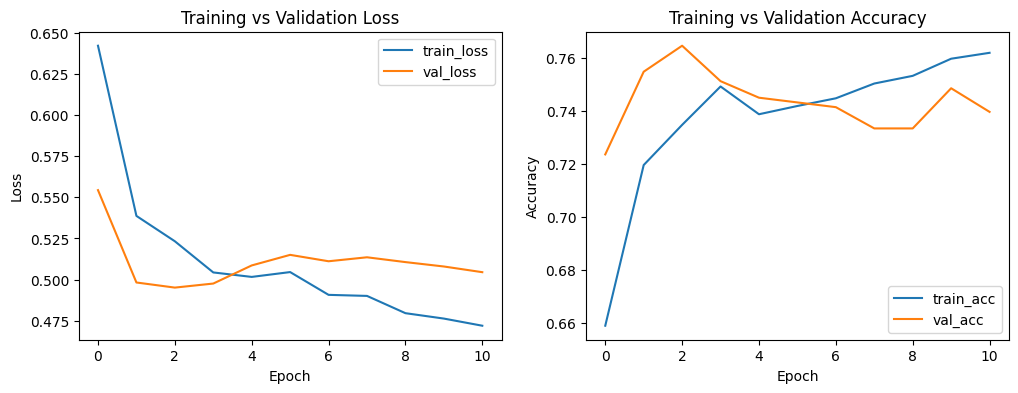

In [218]:
# Plot loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9020    0.7125    0.7961      1033
           1     0.4975    0.7861    0.6093       374

    accuracy                         0.7321      1407
   macro avg     0.6997    0.7493    0.7027      1407
weighted avg     0.7944    0.7321    0.7465      1407



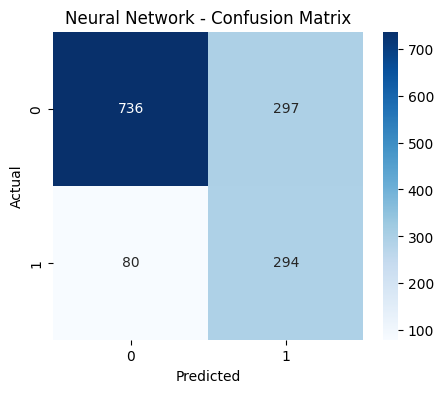

In [219]:
# Load best model (if ModelCheckpoint saved)
best_model = tf.keras.models.load_model(checkpoint_path)

# Predict probabilities and class labels
y_proba = best_model.predict(X_test_scaled).ravel()
y_pred = (y_proba >= 0.5).astype(int)

# Classification report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


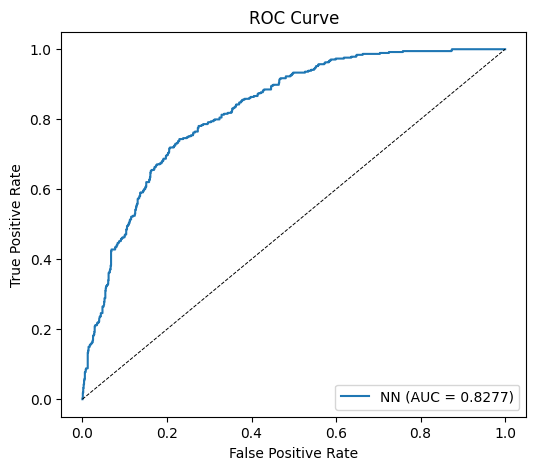

AUC: 0.8277005865269631


In [220]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'NN (AUC = {roc_auc:.4f})')
# Optionally plot Decision Tree AUC if you have dt_proba
# plt.plot(fpr_dt, tpr_dt, label=f'DT (AUC = {auc_dt:.4f})')
plt.plot([0,1],[0,1],'k--', linewidth=0.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC:", roc_auc)


In [221]:
X_train.shape

(5625, 38)

In [222]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
best_threshold = thresholds[np.argmax(tpr - fpr)]
print(best_threshold)

0.5844916


In [223]:
input_dim = 38

def build_optimized_model():
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.15),

        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.10),

        Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),

        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_optimized_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │         2,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,345 (20.88 KB)

 Non-trainable params: 224 (896.00 B)

In [224]:
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    min_lr=1e-5,
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)


In [225]:
cw = class_weight.compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weights = {0: cw[0], 1: cw[1]}
class_weights


{0: np.float64(0.6809927360774818), 1: np.float64(1.8812709030100334)}

In [226]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.20,
    epochs=80,
    batch_size=64,
    class_weight=class_weights,
    callbacks=[early_stop, lr_scheduler],
    verbose=2
)

Epoch 1/80
71/71 - 5s - 65ms/step - accuracy: 0.6722 - loss: 0.7461 - val_accuracy: 0.7262 - val_loss: 0.6657 - learning_rate: 1.0000e-03
Epoch 2/80
71/71 - 0s - 4ms/step - accuracy: 0.7233 - loss: 0.6490 - val_accuracy: 0.7591 - val_loss: 0.6180 - learning_rate: 1.0000e-03
Epoch 3/80
71/71 - 0s - 4ms/step - accuracy: 0.7351 - loss: 0.6173 - val_accuracy: 0.7600 - val_loss: 0.6070 - learning_rate: 1.0000e-03
Epoch 4/80
71/71 - 0s - 4ms/step - accuracy: 0.7416 - loss: 0.6147 - val_accuracy: 0.7609 - val_loss: 0.6129 - learning_rate: 1.0000e-03
Epoch 5/80
71/71 - 0s - 4ms/step - accuracy: 0.7451 - loss: 0.6031 - val_accuracy: 0.7600 - val_loss: 0.6029 - learning_rate: 1.0000e-03
Epoch 6/80
71/71 - 0s - 4ms/step - accuracy: 0.7538 - loss: 0.5905 - val_accuracy: 0.7573 - val_loss: 0.6006 - learning_rate: 1.0000e-03
Epoch 7/80
71/71 - 0s - 4ms/step - accuracy: 0.7524 - loss: 0.5855 - val_accuracy: 0.7564 - val_loss: 0.6009 - learning_rate: 1.0000e-03
Epoch 8/80
71/71 - 0s - 4ms/step - accur

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
=== Optimized Neural Network Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1033
           1       0.58      0.68      0.62       374

    accuracy                           0.78      1407
   macro avg       0.73      0.75      0.74      1407
weighted avg       0.80      0.78      0.79      1407



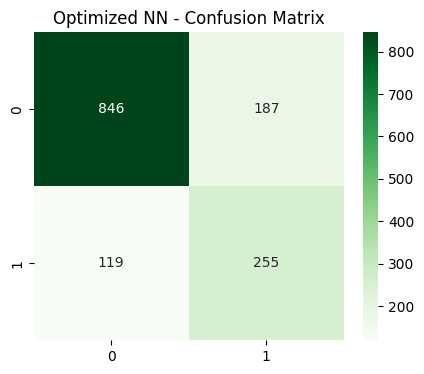

In [227]:
y_proba = model.predict(X_test_scaled).ravel()
y_pred = (y_proba >= best_threshold).astype(int)

print("=== Optimized Neural Network Classification Report ===")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Optimized NN - Confusion Matrix')
plt.show()


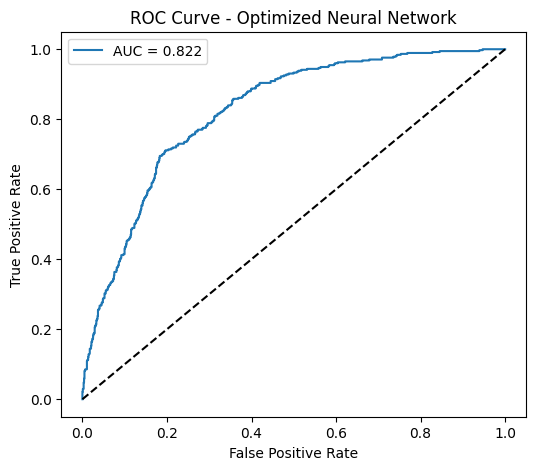

np.float64(0.8223620522749274)

In [228]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Optimized Neural Network")
plt.legend()
plt.show()

roc_auc


In [229]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)